In [12]:
import matplotlib.pyplot as plt
import numpy as np

import pylops
from pylops.utils.wavelets import ricker

plt.style.use('default')
np.random.seed(0)

In [13]:
par = {"ox": -81, "dx": 2, "nx": 81, "ot": 0, "dt": 0.004, "nt": 751, "f0": 30}
# parabolic event
tp0 = [0.6]  # s
px = [0]  # s/m
pxx = [5e-5]  # s²/m²
ampp = [2]

# create axis
taxis, taxis2, xaxis, yaxis = pylops.utils.seismicevents.makeaxis(par)

# create wavelet
wav = ricker(taxis[:41], f0=par["f0"])[0]

# generate model
y = (
    pylops.utils.seismicevents.parabolic2d(xaxis, taxis, tp0, px, pxx, ampp, wav)[1]
)

(np.float64(-81.0), np.float64(79.0), np.float64(3.0), np.float64(0.0))

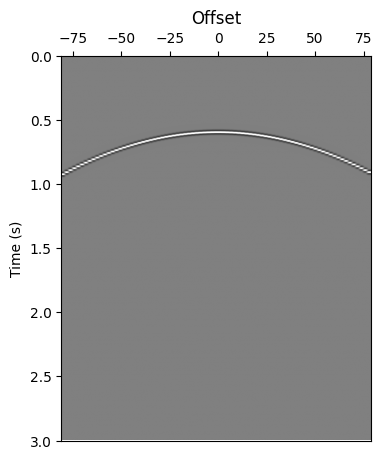

In [14]:
pclip = 0.7
fig, axs = plt.subplots(1, 1, figsize=(4, 5))
axs.imshow(
    y.T,
    cmap="gray",
    vmin=-pclip * np.abs(y).max(),
    vmax=pclip * np.abs(y).max(),
    extent=(xaxis[0], xaxis[-1], taxis[-1], taxis[0]),
)
axs.set(ylabel="Time (s)", title="Offset")
axs.xaxis.set_ticks_position('top')
axs.xaxis.set_label_position('top')
axs.axis("tight")

In [15]:
from scipy.signal import correlate2d

def weighted_cross_correlation(A, B, weights=None):
    """
    计算加权互相关（weighted cross correlation）

    参数:
    A (ndarray): 第一个输入矩阵
    B (ndarray): 第二个输入矩阵
    weights (ndarray): 权重矩阵，必须和 A, B 维度一致

    返回:
    ndarray: 加权互相关结果
    """
    # 确保 A, B 和 weights 的形状一致
    assert A.shape == B.shape, "A, B 和权重矩阵的形状必须相同"
    
    weights = np.ones_like(A)
    # 对 A 和 B 进行加权处理
    weighted_A = A * weights
    weighted_B = B * weights
    
    # 使用 scipy 的 correlate2d 进行加权互相关计算
    correlation = correlate2d(weighted_A, weighted_B, mode='same', boundary='fill')
    
    return correlation

In [16]:
res = weighted_cross_correlation(y, y)
res.shape

(81, 751)

(np.float64(-81.0), np.float64(79.0), np.float64(3.0), np.float64(0.0))

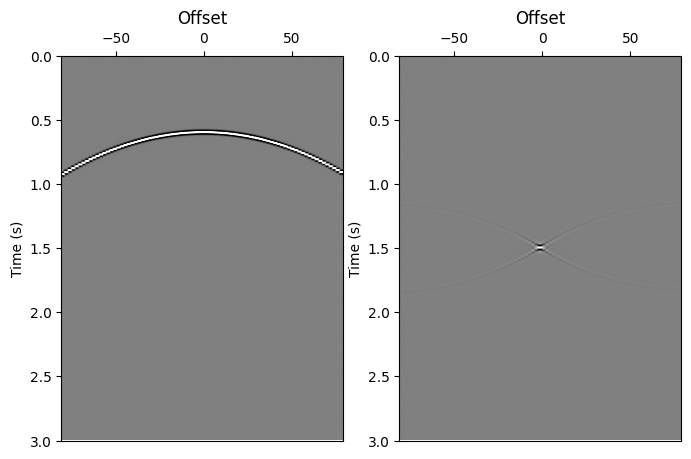

In [18]:
pclip = 0.3
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].imshow(
    y.T,
    cmap="gray",
    vmin=-pclip * np.abs(y).max(),
    vmax=pclip * np.abs(y).max(),
    extent=(xaxis[0], xaxis[-1], taxis[-1], taxis[0]),
)
axs[0].set(ylabel="Time (s)", title="Offset")
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].axis("tight")

axs[1].imshow(
    res.T,
    cmap="gray",
    vmin=-pclip * np.abs(res).max(),
    vmax=pclip * np.abs(res).max(),
    extent=(xaxis[0], xaxis[-1], taxis[-1], taxis[0]),
)
axs[1].set(ylabel="Time (s)", title="Offset")
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')
axs[1].axis("tight")